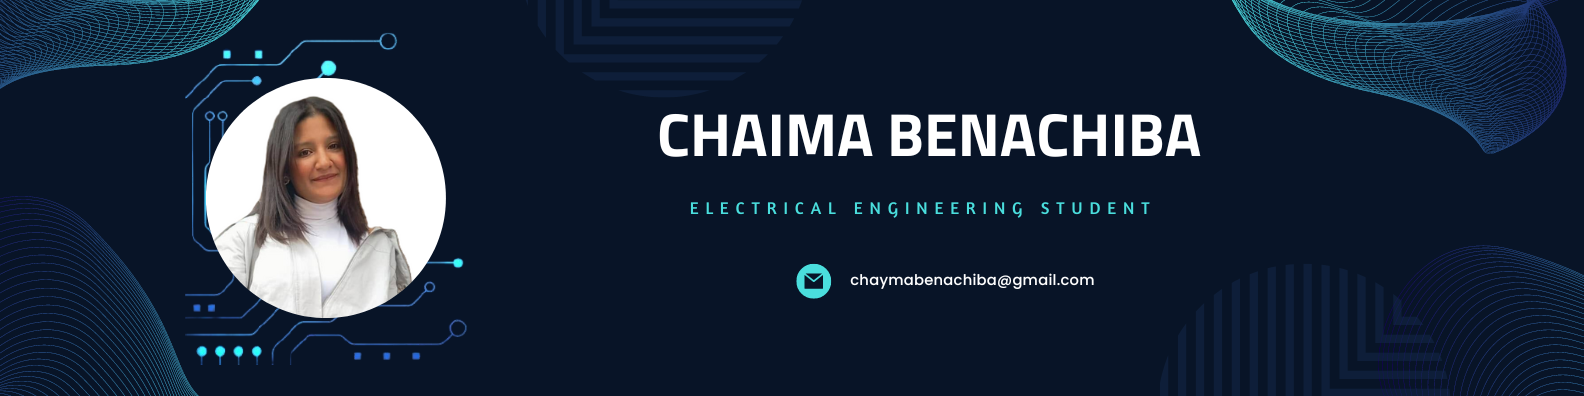

#MACHINE LEARNING INTERNSHIP

# Developed By - Chaima Ben Achiba
## Submitted to Cognorise Infotech




### TASK 3: SPAM EMAIL DETECTION

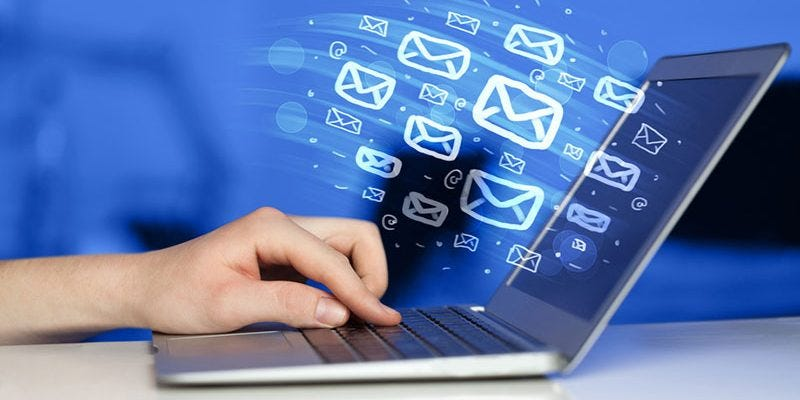

** Import libraries**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from wordcloud import WordCloud


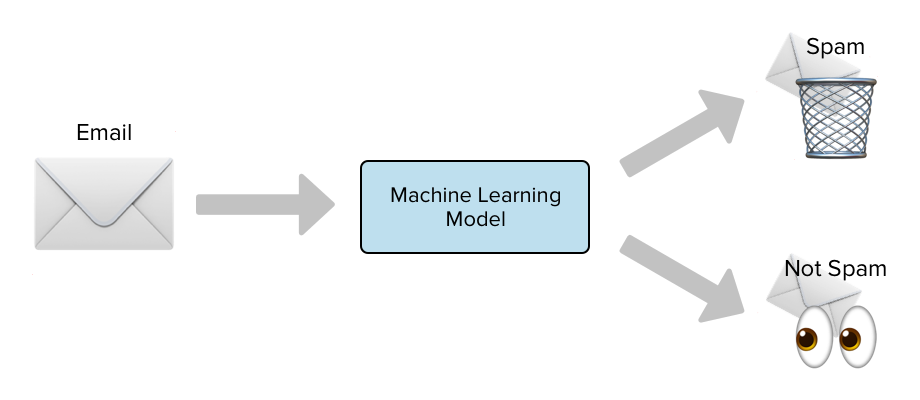

**Load and Preprocess Data**

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
# Top 5 rows
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# last 5 rows
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#some statistics of data
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Shape of dataset
df.shape

(5572, 2)

In [8]:
# column name
df.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
# Count of null value in each column
df.isnull().sum()

Category    0
Message     0
dtype: int64

<Axes: >

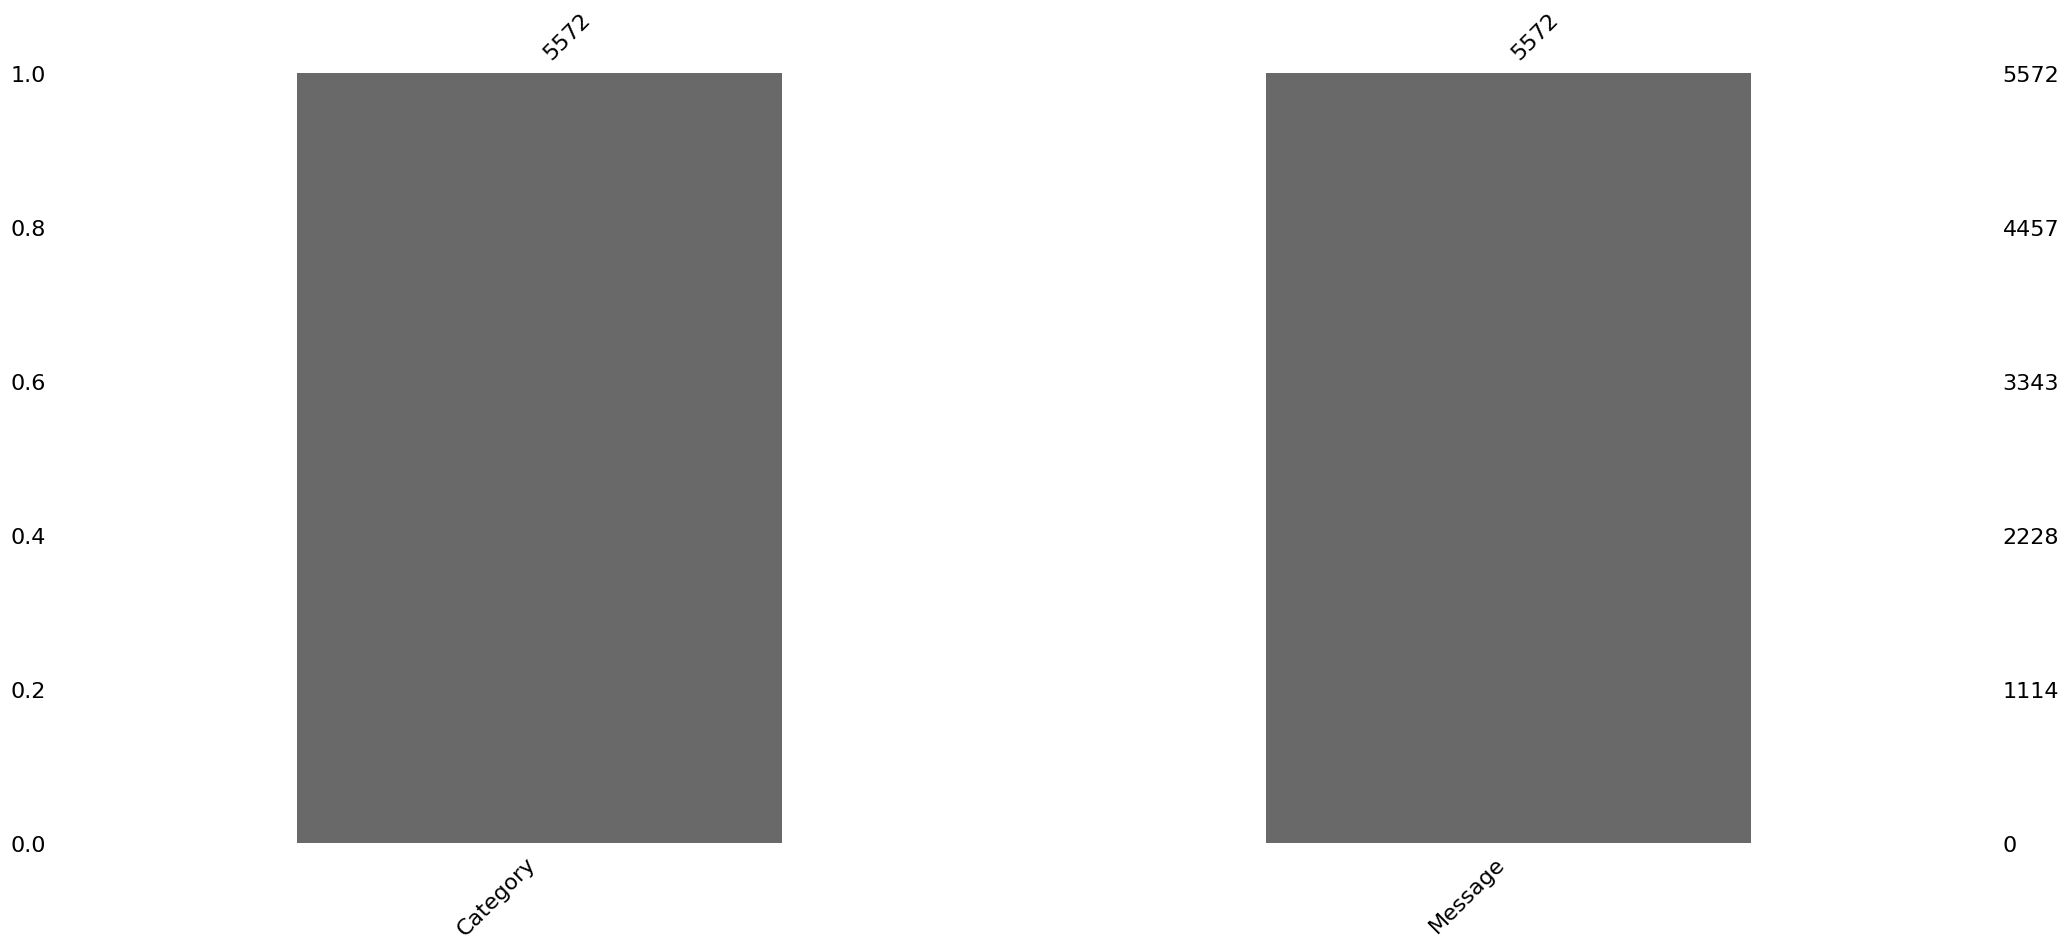

In [11]:
# visualizing null values
msno.bar(df)

In [12]:
#data type of each column
df.dtypes

Category    object
Message     object
dtype: object

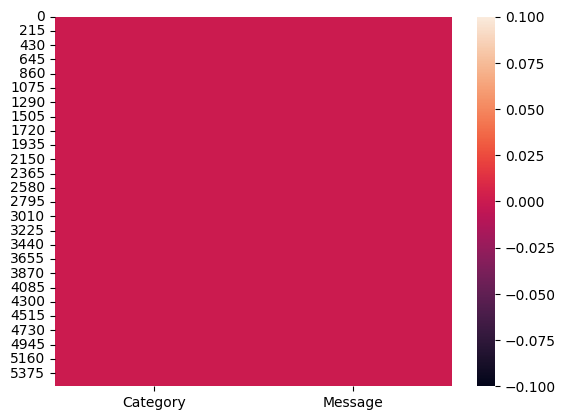

In [18]:
sns.heatmap(df.isnull())
plt.show()

In [13]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [155]:
df.columns = ['Category', 'Message']
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
X = df['Category']
y = df['Message']

In [156]:
print(X)
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


**Data visualization**

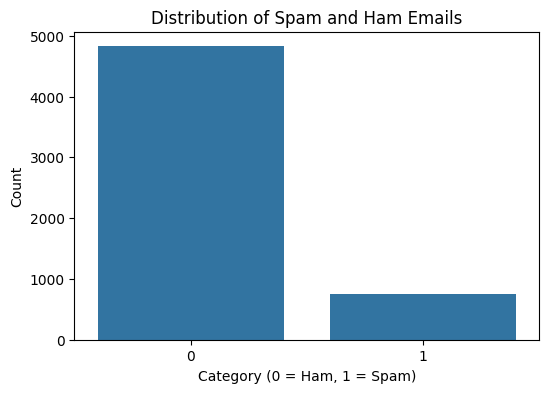

In [44]:
# Distribution of Spam and Ham Emails
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()


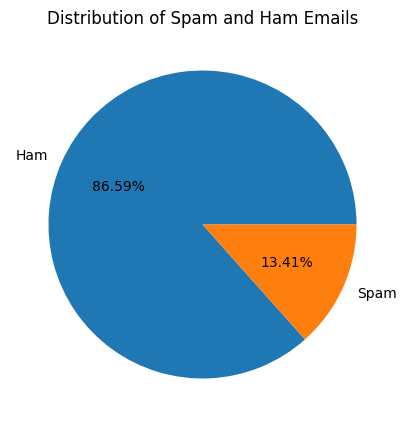

In [51]:


# Pie chart for Spam and Ham Email Distribution
fig = plt.figure(figsize=(10, 5))
plt.pie(df['Category'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f%%')
plt.title('Distribution of Spam and Ham Emails')
plt.show()


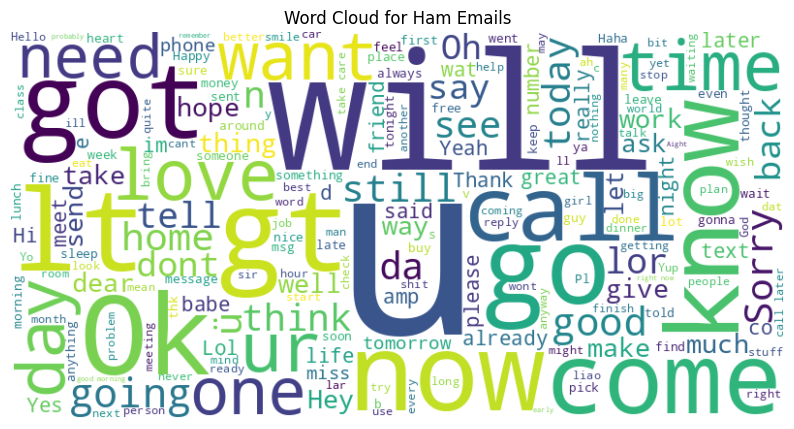

In [49]:
# Word Cloud for Ham Emails
ham_words = ' '.join(list(df[df['Category'] == 0]['Message']))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

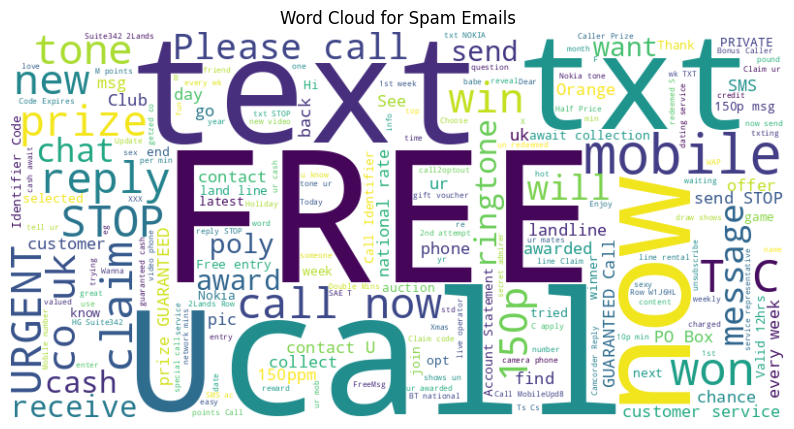

In [50]:
# Word Cloud for Spam Emails
spam_words = ' '.join(list(df[df['Category'] == 1]['Message']))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


**Train and Evaluate Models**

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [94]:
y = df['Category']
X = df['Message']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train = X_train.astype(str)  # Ensure all elements are strings

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)



In [96]:
from sklearn.metrics import classification_report, accuracy_score

def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

In [123]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier()
}

# Logistic Regression

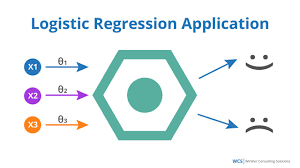

In [158]:
lr_model = LogisticRegression()
lr_model.fit(X_train_features, y_train)
print("Logistic Regression Results:")
train_and_evaluate(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


Logistic Regression Results:
Accuracy: 0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [159]:
prediction = lr_model.predict(X_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

0.9661207089970832

In [160]:
prediction = lr_model.predict(X_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.967713004484305

# Random Forest Classifier


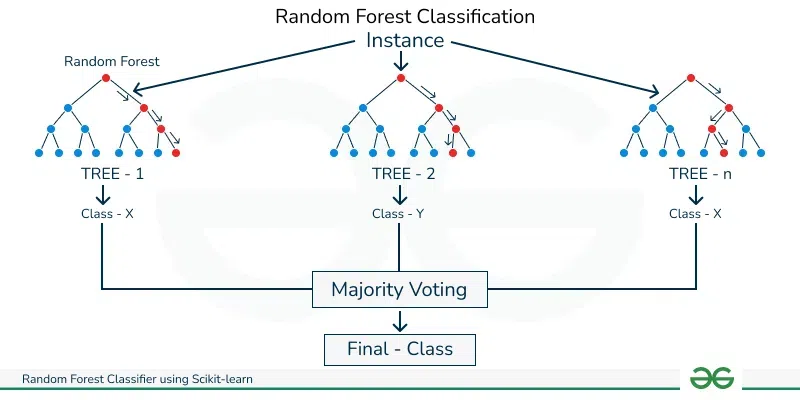

In [175]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_features, y_train)
print("Random Forest Classifier Results:")
train_and_evaluate(rf_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


Random Forest Classifier Results:
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [162]:
prediction = rf_model.predict(X_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

1.0

In [163]:
prediction = rf_model.predict(X_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9802690582959641

# AdaBoosting Classifier

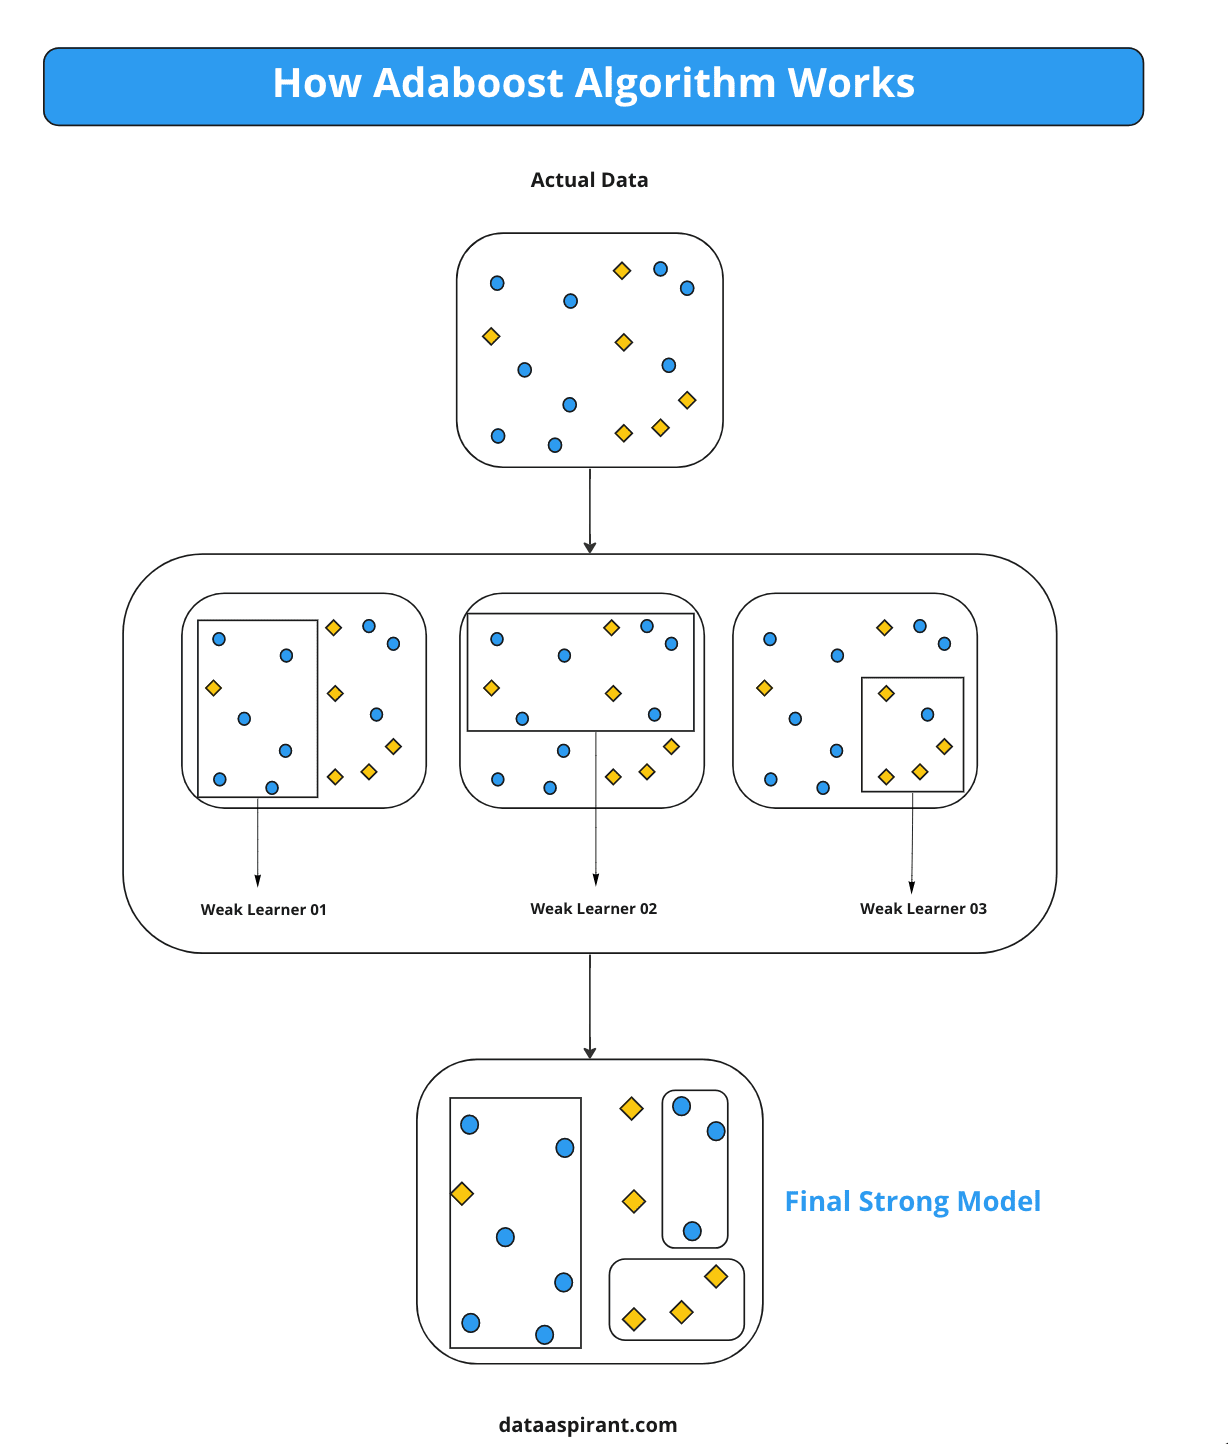

In [201]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
ad_model = AdaBoostClassifier()
ad_model.fit(X_train_features, y_train)
print("AdaBoost Classifier Results:")
train_and_evaluate(ad_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


AdaBoost Classifier Results:
Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [167]:
prediction = ad_model.predict(X_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

0.9798070450975993

In [168]:
prediction = ad_model.predict(X_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9730941704035875

# KNeighbors Classifier

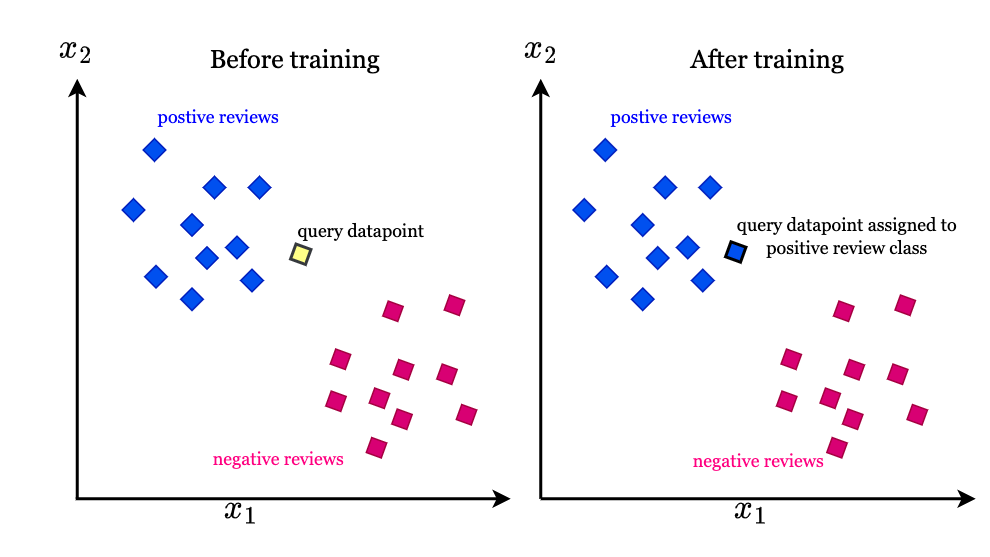

In [169]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_features, y_train)
print("K-Nearest Neighbors Results:")
train_and_evaluate(knn_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


K-Nearest Neighbors Results:
Accuracy: 0.9130044843049328
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.35      0.52       149

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



In [170]:
prediction = knn_model.predict(X_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

0.9165357864034104

In [171]:
prediction = knn_model.predict(X_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9130044843049328

# test

In [208]:
def prediction(model, vectorizer, messages):
    messages_tfidf = vectorizer.transform(messages)
    predictions = model.predict(messages_tfidf)

    labels = label_encoder.inverse_transform(predictions)
    return labels


In [198]:
demo_email = ["Hey there! Just checking in to see if you're available for a quick chat tomorrow."]

features = feature_extraction.transform(demo_email)

prediction = lr_model.predict(features)
print(prediction)

if (prediction[0] == 1):
    print("This is a ham email")
else:
    print("This is a spam email")

[0]
This is a spam email


In [200]:
demo_email = ["Hi team, I've attached the updated project proposal for your review. Let me know if you have any feedback."]

prediction = ad_model.predict(features)
print(prediction)

if (prediction[0] == 1):
    print("This is a ham email")
else:
    print("This is a spam email")

[0]
This is a spam email
